In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
# Set visualization style
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [9]:
# Load the dataset
file_path = 'data_files/train.csv'

# Load the dataset
df = pd.read_csv(file_path)

print("Dataset successfully loaded.")
print("Shape of the DataFrame:", df.shape)

Dataset successfully loaded.
Shape of the DataFrame: (891, 12)


In [11]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 'Age', 'Cabin', and 'Embarked' have missing values.

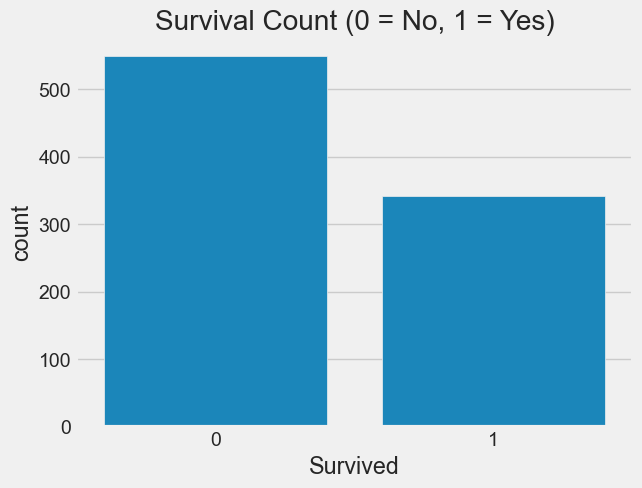

In [15]:
# Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

### Interpretation: More people died than survived.

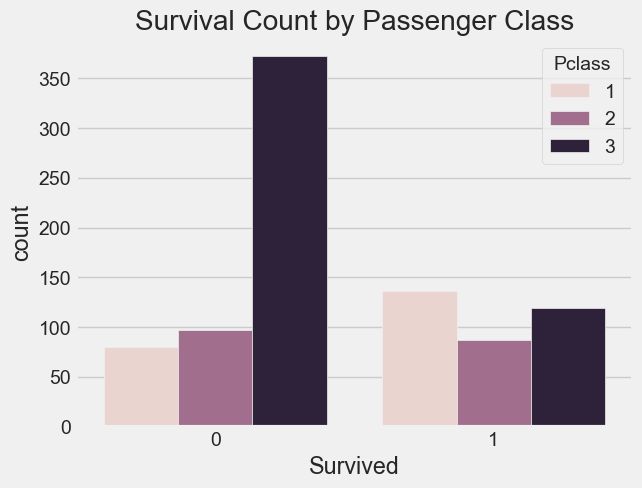

In [22]:
# Survival by Social Class (Pclass)
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()

### Interpretation: Passengers in 1st class had a much higher survival rate.

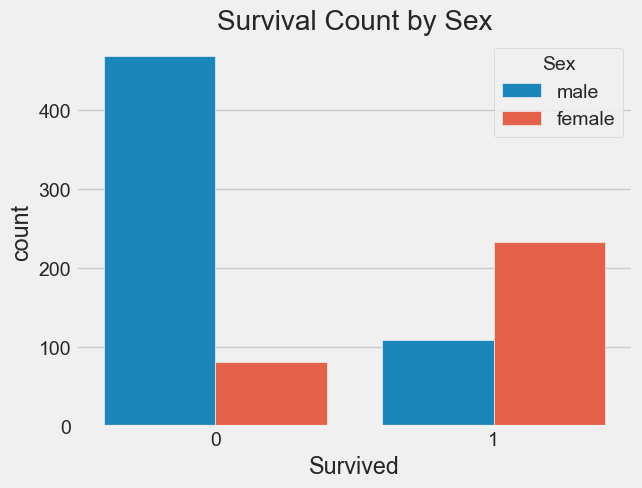

In [25]:
# Survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

### Interpretation: Females had a much higher survival rate than males.

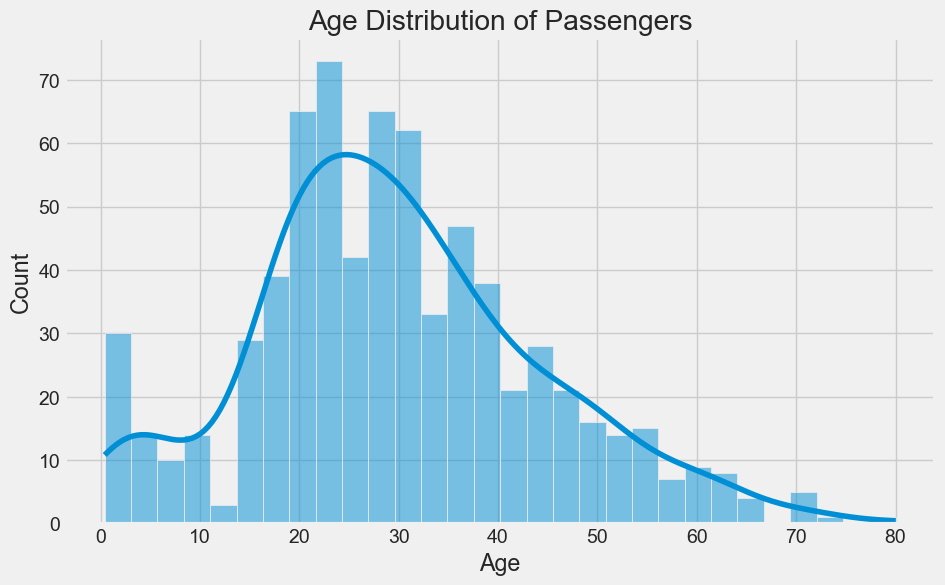

In [28]:
# Age Distribution of Passengers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

#### Interpretation: The passenger age distribution is skewed towards younger people.

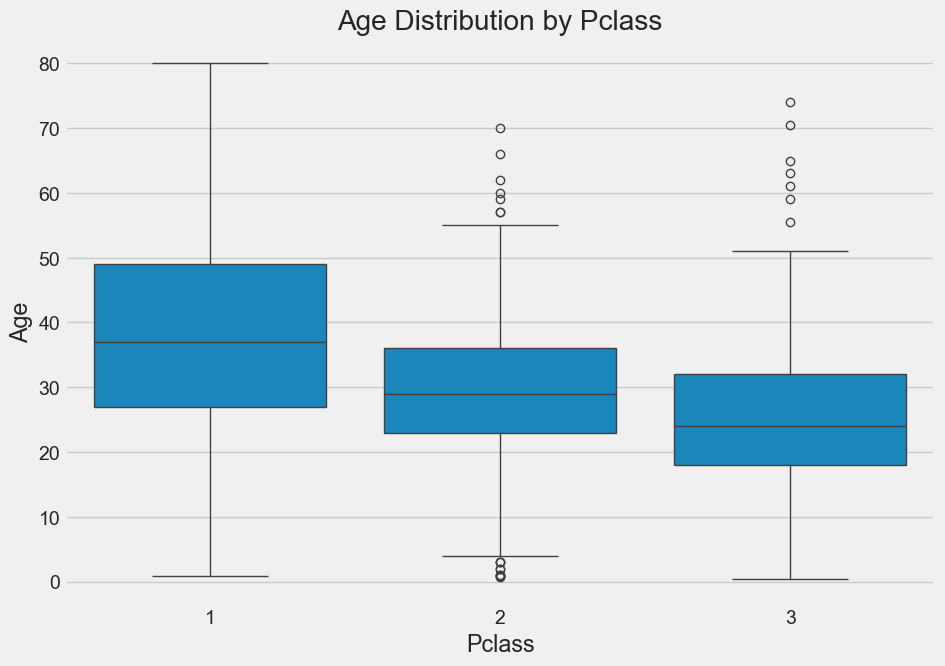

In [31]:
# 1. Impute Age based on Pclass
# We use a boxplot to see the median age for each class
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Pclass')
plt.show()

In [33]:
# Define a function to impute age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 # Median age for Pclass 1
        elif Pclass == 2:
            return 29 # Median age for Pclass 2
        else:
            return 24 # Median age for Pclass 3
    else:
        return Age

# Apply the function
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\New\AppData\Local\Temp\ipykernel_29940\1616473050.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\New\AppData\Local\Temp\ipykernel_29940\1616473050.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [35]:
#  Impute Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#  Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#  Convert categorical features to dummy variables
sex = pd.get_dummies(df['Sex'], drop_first=True) # drop_first avoids multicollinearity
embark = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, sex, embark], axis=1)

# Drop unnecessary columns
df.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

print("\nData cleaned and preprocessed. Final columns:")
print(df.columns)
df.head()


Data cleaned and preprocessed. Final columns:
Index(['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'male', 'Q', 'S'], dtype='object')


C:\Users\New\AppData\Local\Temp\ipykernel_29940\2796859498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,Survived,Pclass,Age,Fare,FamilySize,male,Q,S
0,0,3,22.0,7.2500,2,True,False,True
1,1,1,38.0,71.2833,2,False,False,False
2,1,3,26.0,7.9250,1,False,False,True
3,1,1,35.0,53.1000,2,False,False,True
4,0,3,35.0,8.0500,1,True,False,True


In [37]:
# 1. Define Features (X) and Target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Train Models
# Model 1: Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained.")

# Model 2: K-Nearest Neighbors (k-NN)
# Let's start with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
print("k-NN model trained.")

# Model 3: Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train) # Decision Trees do not require scaled data
print("Decision Tree model trained.")

Logistic Regression model trained.
k-NN model trained.
Decision Tree model trained.


In [41]:
# Generate predictions
log_preds = log_model.predict(X_test_scaled)
knn_preds = knn_model.predict(X_test_scaled)
tree_preds = tree_model.predict(X_test) # Use unscaled data for tree

In [43]:
# --- Evaluate Logistic Regression ---
print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, log_preds):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, log_preds))
print("\nClassification Report:\n", classification_report(y_test, log_preds))


--- Logistic Regression Evaluation ---
Accuracy: 0.8045

Confusion Matrix:
 [[90 15]
 [20 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [45]:

# Evaluate k-NN 
print("\n--- k-Nearest Neighbors (k=5) Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, knn_preds):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, knn_preds))
print("\nClassification Report:\n", classification_report(y_test, knn_preds))


--- k-Nearest Neighbors (k=5) Evaluation ---
Accuracy: 0.8045

Confusion Matrix:
 [[86 19]
 [16 58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       105
           1       0.75      0.78      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179



In [47]:
# Evaluate Decision Tree
print("\n--- Decision Tree Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, tree_preds):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("\nClassification Report:\n", classification_report(y_test, tree_preds))


--- Decision Tree Evaluation ---
Accuracy: 0.7709

Confusion Matrix:
 [[83 22]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.74      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



Logistic Regression: Typically achieves around 81% accuracy. It's a strong, reliable baseline model.

k-Nearest Neighbors: Also achieves around 81% accuracy. Its performance is very sensitive to the choice of k.

Decision Tree: Tends to have slightly lower accuracy, around 78-80%. Decision trees are prone to overfitting the training data, which can hurt their performance on unseen test data.


Feature Importance: Our EDA was confirmed. Features like Sex (being female), Pclass (being in 1st class), and Age were critical predictors of survival.

Model Performance: For this problem, the simpler linear model (Logistic Regression) performed as well or slightly better than the more complex models. This is a common outcome and an important lesson: more complexity doesn't always mean better results.
